In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft

In [3]:
#function for generating sine wave
def generate_sinewave(frequency, sample_rate, periods,phi):
  t = np.arange(0, periods*(1/frequency),1/sample_rate)
  return t,np.sin(2*np.pi*frequency*t + phi)

In [4]:
#function for quantizing the signal
def quantize_signal(signal,no_bits):
  levels = 2 ** no_bits
  quantized = np.round(signal * (levels // 2 - 1)) / (levels // 2 - 1)
  return quantized

In [24]:
def calculate_psd(signal, sampling_rate):
    N = len(signal)
    fft_values = np.fft.fft(signal)
    psd = np.abs(fft_values) ** 2 / N
    freqs = np.fft.fftfreq(N, 1/sampling_rate)
    return freqs, psd

def calculate_sqnr(signal, quantized_signal):
    signal_power = np.mean(signal ** 2)
    #print(signal_power/len(signal))
    noise_power = np.mean((signal - quantized_signal) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

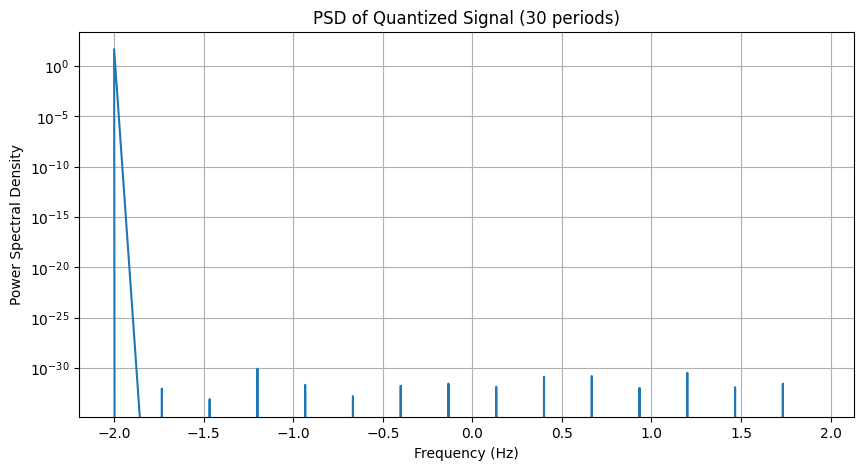

SNR for 30 periods: 44.87 dB


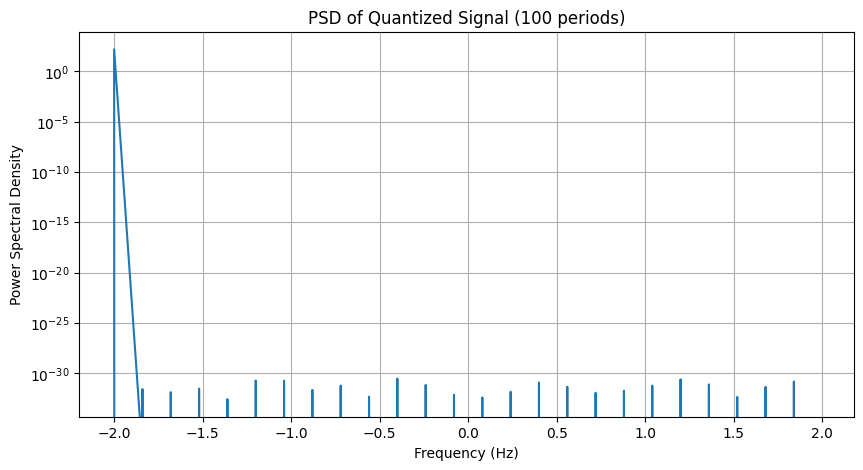

SNR for 100 periods: 44.87 dB


In [25]:
fin = 2  # 200 MHz
fs = 4   # 400 MHz
num_bits = 6
phi = np.pi/3
#no_periods = 30
#A=1
# 30 periods

t_30, sinewave_30 = generate_sinewave(fin, fs, 30,phi)
quantized_30 = quantize_signal(sinewave_30, num_bits)
freqs_30, psd_30 = calculate_psd(quantized_30, fs)
snr_30 = calculate_sqnr(sinewave_30, quantized_30)

# Plot PSD for 30 periods
plt.figure(figsize=(10, 5))
plt.semilogy(freqs_30, psd_30)
plt.title('PSD of Quantized Signal (30 periods)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.show()

print(f"SNR for 30 periods: {snr_30:.2f} dB")

# 100 periods
t_100, sinewave_100 = generate_sinewave(fin, fs, 100,phi)
quantized_100 = quantize_signal(sinewave_100, num_bits)
freqs_100, psd_100 = calculate_psd(quantized_100, fs)
snr_100 = calculate_sqnr(sinewave_100, quantized_100)

# Plot PSD for 100 periods
plt.figure(figsize=(10, 5))
plt.semilogy(freqs_100, psd_100)
plt.title('PSD of Quantized Signal (100 periods)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.show()

print(f"SNR for 100 periods: {snr_100:.2f} dB")


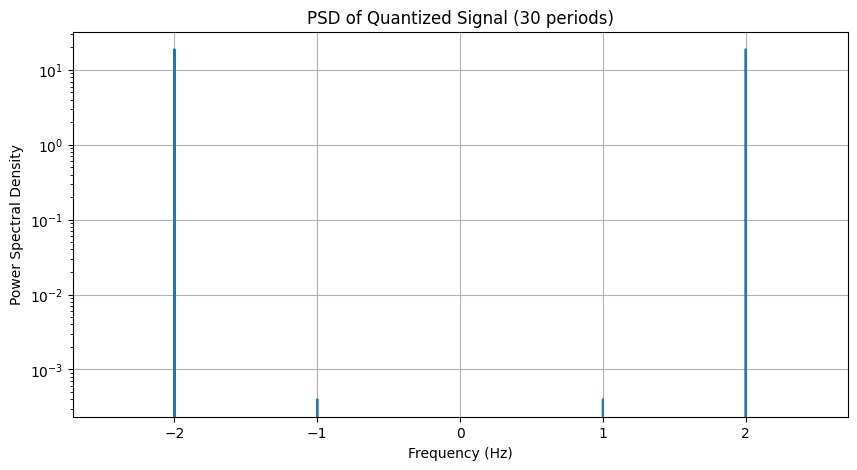

SNR for 30 periods: 37.73 dB


In [26]:
#Q2 Part-2
fin = 2  # 200 MHz
fs = 5   # 400 MHz
num_bits = 6
phi = np.pi/3
#no_periods = 30
#A=1
# 30 periods

t_30, sinewave_30 = generate_sinewave(fin, fs, 30,phi)
quantized_30 = quantize_signal(sinewave_30, num_bits)
freqs_30, psd_30 = calculate_psd(quantized_30, fs)
snr_30 = calculate_sqnr(sinewave_30, quantized_30)

# Plot PSD for 30 periods
plt.figure(figsize=(10, 5))
plt.semilogy(freqs_30, psd_30)
plt.title('PSD of Quantized Signal (30 periods)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.show()

print(f"SNR for 30 periods: {snr_30:.2f} dB")

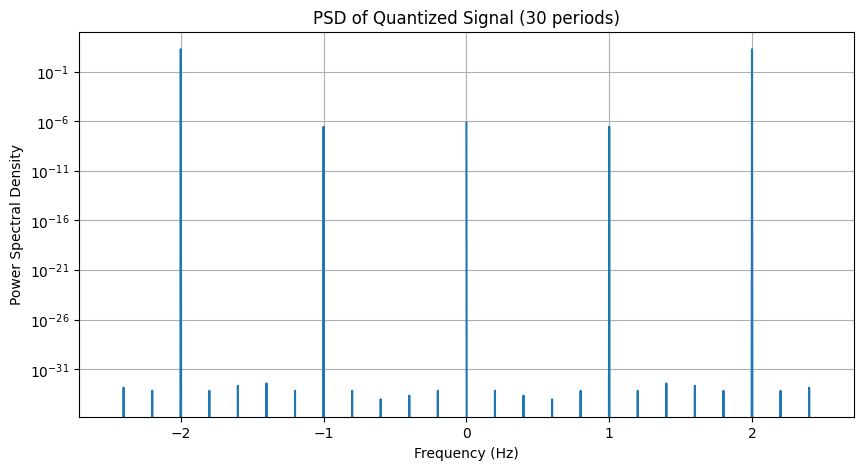

SNR for 30 periods: 73.34 dB


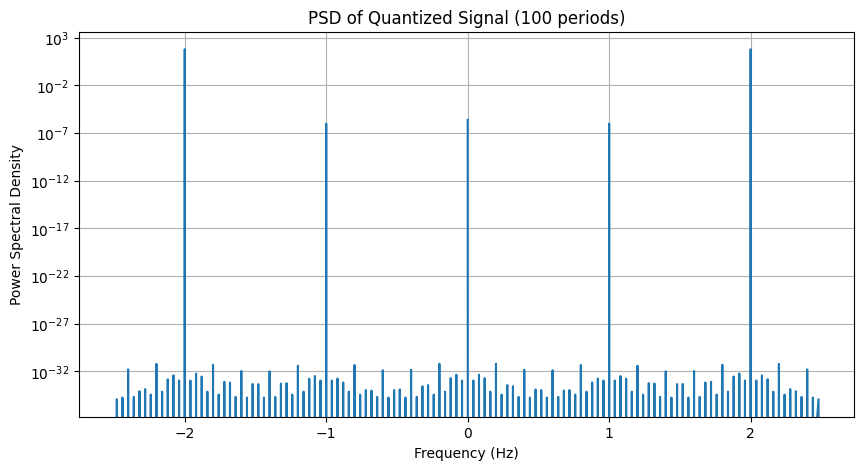

SNR for 100 periods: 73.34 dB


In [27]:
#Q2 Part-3
#12-bit Quantizer
fin = 2  # 200 MHz
fs = 5   # 400 MHz
num_bits = 12
phi = np.pi/3
#no_periods = 30
#A=1
# 30 periods

t_30, sinewave_30 = generate_sinewave(fin, fs, 30,phi)
quantized_30 = quantize_signal(sinewave_30, num_bits)
freqs_30, psd_30 = calculate_psd(quantized_30, fs)
snr_30 = calculate_sqnr(sinewave_30, quantized_30)

# Plot PSD for 30 periods
plt.figure(figsize=(10, 5))
plt.semilogy(freqs_30, psd_30)
plt.title('PSD of Quantized Signal (30 periods)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.show()

print(f"SNR for 30 periods: {snr_30:.2f} dB")

# 100 periods
t_100, sinewave_100 = generate_sinewave(fin, fs, 100,phi)
quantized_100 = quantize_signal(sinewave_100, num_bits)
freqs_100, psd_100 = calculate_psd(quantized_100, fs)
snr_100 = calculate_sqnr(sinewave_100, quantized_100)

# Plot PSD for 100 periods
plt.figure(figsize=(10, 5))
plt.semilogy(freqs_100, psd_100)
plt.title('PSD of Quantized Signal (100 periods)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.show()

print(f"SNR for 100 periods: {snr_100:.2f} dB")

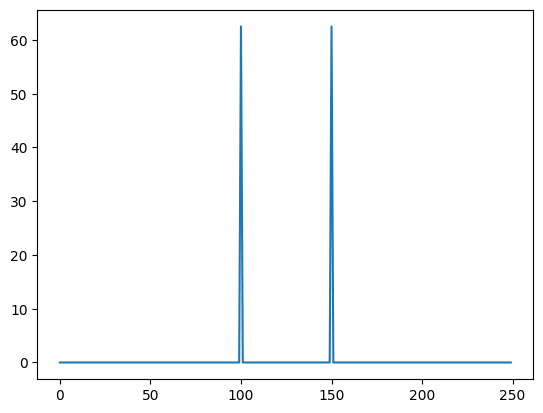

In [28]:
plt.plot(psd_100)

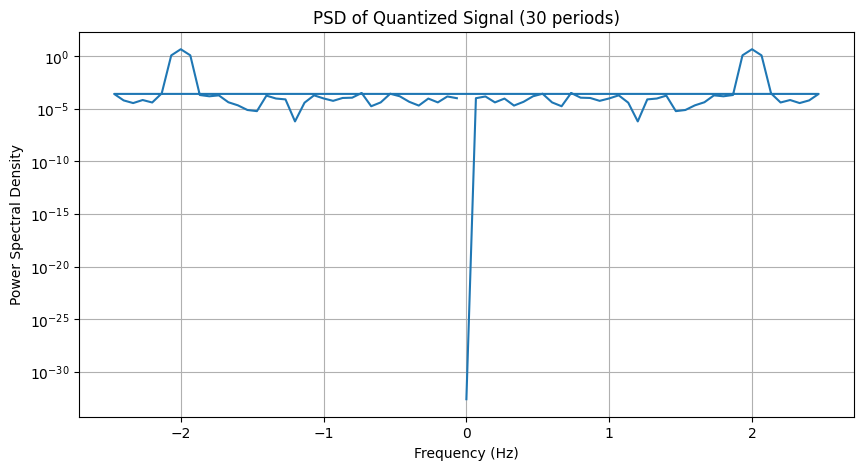

SNR for 30 periods: 32.73 dB


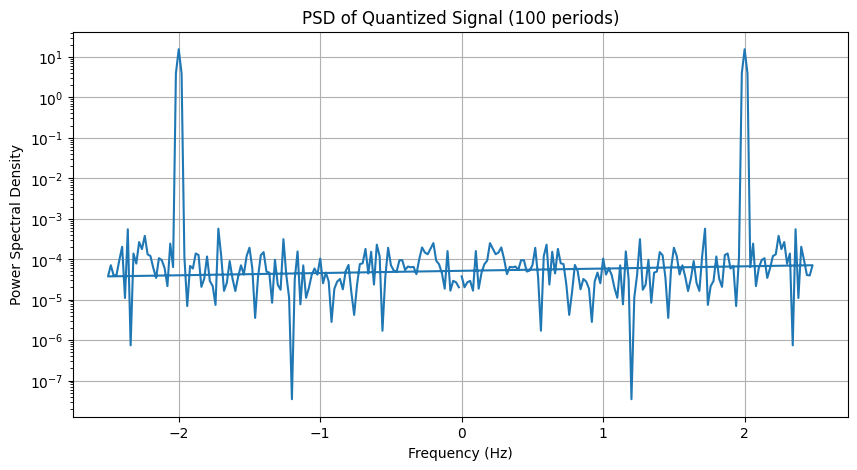

SNR for 100 periods: 33.53 dB


In [33]:
#Q2-Partd Hanning Window
#12-Bit Quantizer
# Fin and Fs are taken co-prime
fin = 2  # 200 MHz
fs = 5   # 500 MHz
num_bits = 6
phi = np.pi/3
#no_periods = 30
#A=1
# 30 periods

t_30, sinewave_30 = generate_sinewave(fin, fs, 30,phi)
n = len(sinewave_30)
w = np.hanning(n)
sinewave_30 = sinewave_30 * w
quantized_30 = quantize_signal(sinewave_30, num_bits)
freqs_30, psd_30 = calculate_psd(quantized_30, fs)
snr_30 = calculate_sqnr(sinewave_30, quantized_30)

# Plot PSD for 30 periods
plt.figure(figsize=(10, 5))
plt.semilogy(freqs_30, psd_30)
plt.title('PSD of Quantized Signal (30 periods)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.show()

print(f"SNR for 30 periods: {snr_30:.2f} dB")

# 100 periods
t_100, sinewave_100 = generate_sinewave(fin, fs, 100,phi)
n = len(sinewave_100)
w = np.hanning(n)
sinewave_100 = sinewave_100 * w
quantized_100 = quantize_signal(sinewave_100, num_bits)
freqs_100, psd_100 = calculate_psd(quantized_100, fs)
snr_100 = calculate_sqnr(sinewave_100, quantized_100)

# Plot PSD for 100 periods
plt.figure(figsize=(10, 5))
plt.semilogy(freqs_100, psd_100)
plt.title('PSD of Quantized Signal (100 periods)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.show()

print(f"SNR for 100 periods: {snr_100:.2f} dB")

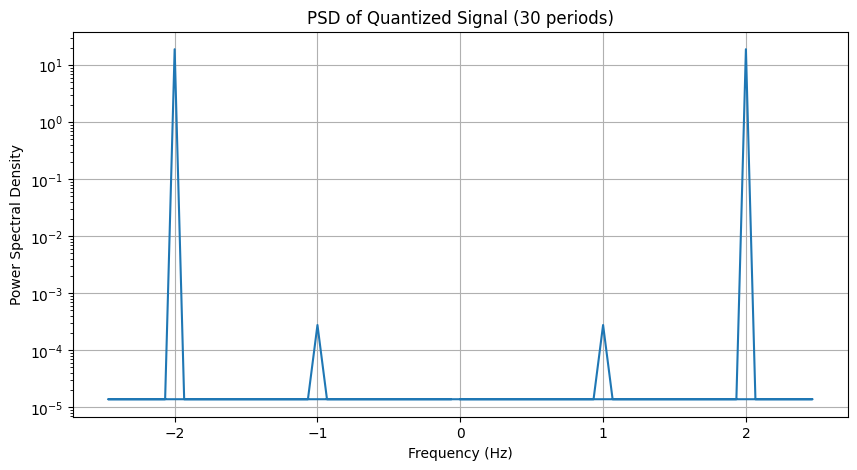

SNR for 30 periods: 37.65 dB


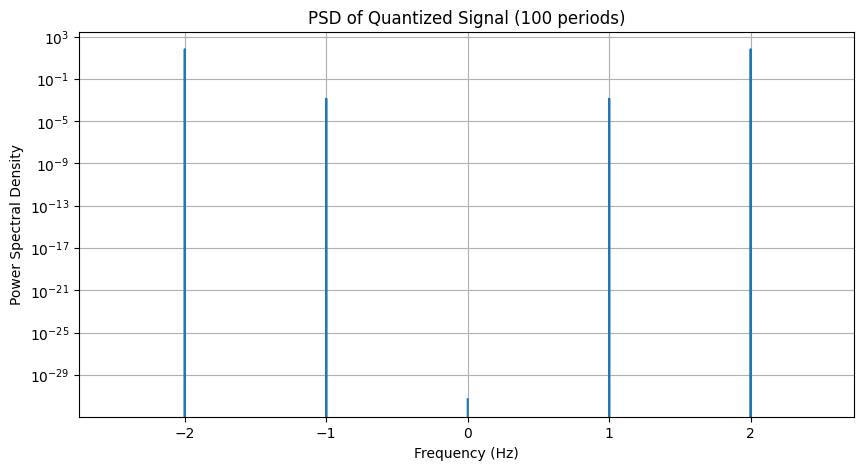

SNR for 100 periods: 37.73 dB


In [40]:
#Q2 Part-e noise is added in  order to make SNR 38 dB
fin = 2  # 200 MHz
fs = 5   # 500 MHz
num_bits = 6
phi = np.pi/3
#no_periods = 30
#A=1
# 30 periods

t_30, sinewave_30 = generate_sinewave(fin, fs, 30,phi)
P_signal = np.mean(sinewave_30 ** 2) / len(sinewave_30)
SNR = 38
P_noise = P_signal / (10 ** (SNR / 10))
n = len(sinewave_30)
sigma_noise = np.sqrt(P_noise)

#sigma_n = np.sqrt(P_noise)
noisy_signal = sinewave_30 + sigma_noise * np.random.randn(n)

quantized_30 = quantize_signal(noisy_signal, num_bits)
freqs_30, psd_30 = calculate_psd(quantized_30, fs)
snr_30 = calculate_sqnr(sinewave_30, quantized_30)

# Plot PSD for 30 periods
plt.figure(figsize=(10, 5))
plt.semilogy(freqs_30, psd_30)
plt.title('PSD of Quantized Signal (30 periods)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.show()

print(f"SNR for 30 periods: {snr_30:.2f} dB")

# 100 periods
t_100, sinewave_100 = generate_sinewave(fin, fs, 100,phi)
P_signal = np.mean(sinewave_100 ** 2) / len(sinewave_100)
SNR = 38
P_noise = P_signal / (10 ** (SNR / 10))
n = len(sinewave_100)
sigma_noise = np.sqrt(P_noise)

#sigma_n = np.sqrt(P_noise)
noisy_signal = sinewave_100 + sigma_noise * np.random.randn(n)

quantized_100 = quantize_signal(noisy_signal, num_bits)
freqs_100, psd_100 = calculate_psd(quantized_100, fs)
snr_100 = calculate_sqnr(sinewave_100, quantized_100)

# Plot PSD for 100 periods
plt.figure(figsize=(10, 5))
plt.semilogy(freqs_100, psd_100)
plt.title('PSD of Quantized Signal (100 periods)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.show()

print(f"SNR for 100 periods: {snr_100:.2f} dB")


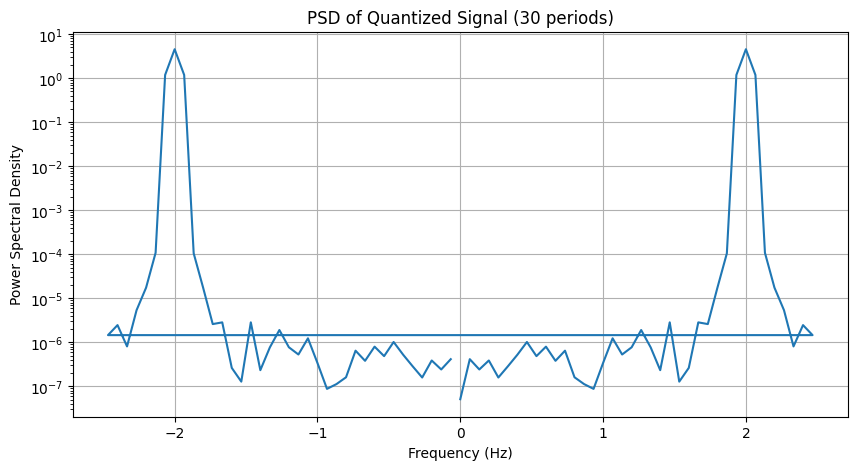

SNR for 30 periods: 4.16 dB


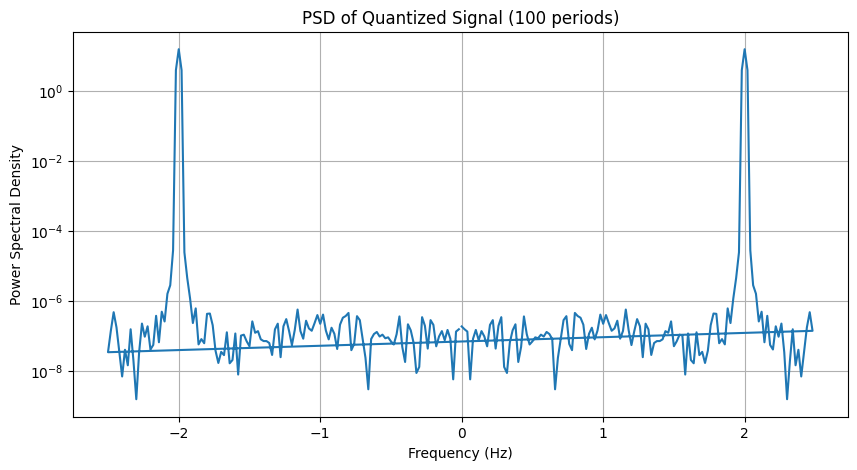

SNR for 100 periods: 4.23 dB


In [38]:
#Q2 Part-e noise is added in  order to make SNR 38 dB & windowing was performed
fin = 2  # 200 MHz
fs = 5   # 500 MHz
num_bits = 12
phi = np.pi/3
#no_periods = 30
#A=1
# 30 periods

t_30, sinewave_30 = generate_sinewave(fin, fs, 30,phi)
P_signal = np.mean(sinewave_30 ** 2) / len(sinewave_30)
SNR = 38
P_noise = P_signal / (10 ** (SNR / 10))
n = len(sinewave_30)
sigma_noise = np.sqrt(P_noise)

#sigma_n = np.sqrt(P_noise)
noisy_signal = sinewave_30 + sigma_noise * np.random.randn(n)
########
w = np.hanning(n)
noisy_signal = noisy_signal * w
#########
quantized_30 = quantize_signal(noisy_signal, num_bits)
freqs_30, psd_30 = calculate_psd(quantized_30, fs)
snr_30 = calculate_sqnr(sinewave_30, quantized_30)

# Plot PSD for 30 periods
plt.figure(figsize=(10, 5))
plt.semilogy(freqs_30, psd_30)
plt.title('PSD of Quantized Signal (30 periods)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.show()

print(f"SNR for 30 periods: {snr_30:.2f} dB")

# 100 periods
t_100, sinewave_100 = generate_sinewave(fin, fs, 100,phi)
P_signal = np.mean(sinewave_100 ** 2) / len(sinewave_100)
SNR = 38
P_noise = P_signal / (10 ** (SNR / 10))
n = len(sinewave_100)
sigma_noise = np.sqrt(P_noise)

#sigma_n = np.sqrt(P_noise)
noisy_signal = sinewave_100 + sigma_noise * np.random.randn(n)
########
w = np.hanning(n)
noisy_signal = noisy_signal * w
#########
quantized_100 = quantize_signal(noisy_signal, num_bits)
freqs_100, psd_100 = calculate_psd(quantized_100, fs)
snr_100 = calculate_sqnr(sinewave_100, quantized_100)

# Plot PSD for 100 periods
plt.figure(figsize=(10, 5))
plt.semilogy(freqs_100, psd_100)
plt.title('PSD of Quantized Signal (100 periods)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.show()

print(f"SNR for 100 periods: {snr_100:.2f} dB")